In [1]:
dataset = "abalone"

In [2]:
from MRF import *
import matplotlib.pyplot as plt
from tqdm import tqdm

ModuleNotFoundError: No module named 'MRF'

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
data_in = pd.read_csv(f"/Users/ryanlucas/Desktop/MacroRandomForest/Datasets/{dataset}.csv")

In [ ]:
data_in = data_in.iloc[:, 1:]

In [ ]:
oos_pos = np.arange(data_in.index[-80], data_in.index[-1]+1)
# oos_pos = np.arange(150, 200)
print(oos_pos)

[4096 4097 4098 4099 4100 4101 4102 4103 4104 4105 4106 4107 4108 4109
 4110 4111 4112 4113 4114 4115 4116 4117 4118 4119 4120 4121 4122 4123
 4124 4125 4126 4127 4128 4129 4130 4131 4132 4133 4134 4135 4136 4137
 4138 4139 4140 4141 4142 4143 4144 4145 4146 4147 4148 4149 4150 4151
 4152 4153 4154 4155 4156 4157 4158 4159 4160 4161 4162 4163 4164 4165
 4166 4167 4168 4169 4170 4171 4172 4173 4174 4175]


In [ ]:
MRF = MacroRandomForest(data=data_in,y_pos=0,x_pos=np.arange(1,4), B = 1000, mtry_frac=0.25, oos_pos=oos_pos, trend_push=4,quantile_rate=0.3, print_b = True)

In [ ]:
mrf_output = MRF._ensemble_loop()

exception calling callback for <Future at 0x7fe1de31d4f0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/ryanlucas/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/ryanlucas/opt/anaconda3/lib/python3.8/multiprocessing/queues.py", line 116, in get
    return _ForkingPickler.loads(res)
ModuleNotFoundError: No module named 'MRF_2'
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/ryanlucas/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/ryanlucas/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "/Users/ryanl

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
profile_code = False
if profile_code:
    %load_ext line_profiler
    %lprun -f MRF._one_MRF_tree MRF._one_MRF_tree(1)

In [ ]:
y = np.array(mrf_output['YandX'].iloc[150:, 0])

In [ ]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions_1000.csv", index_col = "Unnamed: 0")

In [ ]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [ ]:
phils_preds.columns = my_preds.columns

In [ ]:
phils_betas = pd.read_csv("/Users/ryanlucas/Desktop/MRF/mrf_betas_1000.csv", index_col = "Unnamed: 0")

In [ ]:
my_betas = pd.DataFrame(mrf_output['betas'])

In [ ]:
phils_betas.columns = my_betas.columns

In [ ]:
abs(my_betas.subtract(phils_betas)).describe()

,0,1,2,3
count,199.000000,199.000000,199.000000,199.000000
mean,0.028983,0.036229,0.032035,0.032902
std,0.023105,0.026766,0.028651,0.023430
min,0.000348,0.000217,0.000003,0.000498
25%,0.009914,0.016633,0.009949,0.017161
50%,0.021413,0.029555,0.025583,0.027323
75%,0.043084,0.049906,0.044557,0.043860
max,0.118921,0.158606,0.148322,0.116260


Text(0.5, 0.98, '1000 iterations on the mrf_data Dataset: betas from Python and R implementation. Python (light) and R (dark) colors.')

Text(0.5, 1.0, '$\\beta_0$')

Text(0.5, 1.0, '$\\beta_1$')

Text(0.5, 1.0, '$\\beta_2$')

Text(0.5, 1.0, '$\\beta_3$')

Text(0.5, 0, '$t$')

Text(0.5, 0, '$t$')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

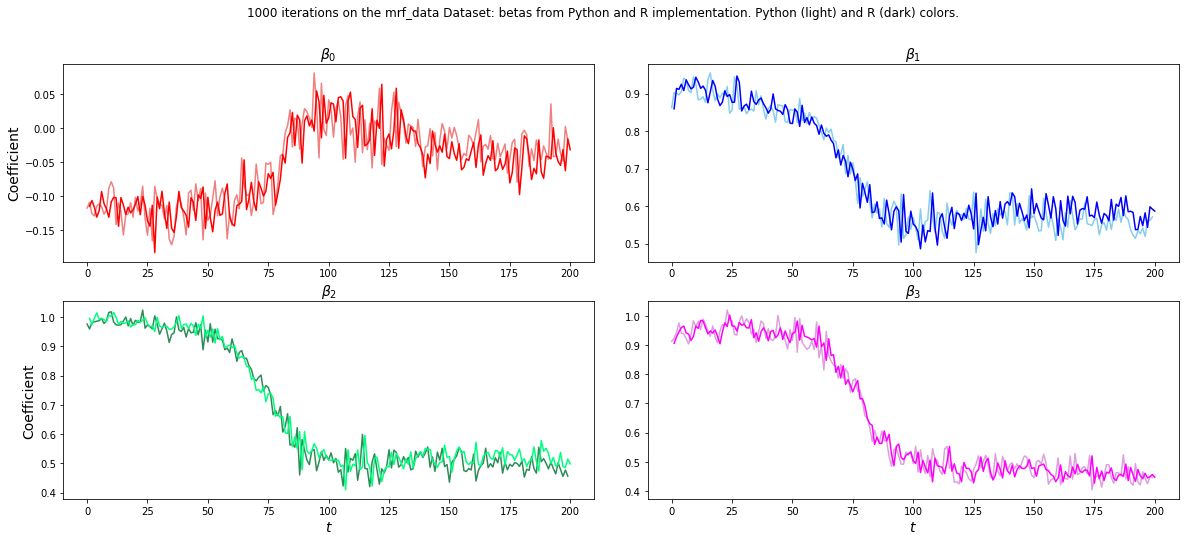

In [ ]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle(f"1000 iterations on the {dataset} Dataset: betas from Python and R implementation. Python (light) and R (dark) colors.", )

phils_preds_on = True
my_preds_on = True

plt.rcParams['figure.figsize'] = (20,15)
color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

if my_preds_on:
    ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
    ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
    ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
    ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])

if phils_preds_on:
    ax[0, 0].plot(pd.DataFrame(phils_betas).iloc[:, 0], color_list_1[0])
    ax[0, 1].plot(pd.DataFrame(phils_betas).iloc[:, 1], color_list_1[1])
    ax[1, 0].plot(pd.DataFrame(phils_betas).iloc[:, 2], color_list_1[2])
    ax[1, 1].plot(pd.DataFrame(phils_betas).iloc[:, 3], color_list_1[3])

ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

In [ ]:
my_preds.columns = np.arange(0, len(my_preds.columns))

In [ ]:
phils_preds

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,1.682206,-0.264764,-0.795037,-0.508662,-1.530600,-1.294582,0.560144,-1.389779,0.695617,-0.220890,...,-0.694528,-0.274733,0.250321,-0.842316,0.603303,0.154581,0.503417,0.106385,0.113147,0.491737
2,2.382283,-0.285872,-1.562105,-0.699319,-2.404824,-2.730748,0.447154,-1.719886,0.964015,-0.378960,...,-0.847276,-0.369022,0.498530,-2.014168,0.677147,0.111959,0.668704,0.136317,0.002302,0.478152
3,1.486605,-0.184021,-1.576219,-0.511352,-1.837472,-2.367569,0.561208,-1.143711,0.836950,-0.275927,...,-0.461661,-0.347260,0.347328,-0.967537,0.436887,0.121504,0.613070,0.349078,0.230549,0.502324
4,1.568405,-0.401175,-0.888468,-0.649725,-1.834673,-1.744418,0.402107,-1.479082,0.755985,-0.145864,...,-0.410041,-0.207538,0.140819,-0.756777,0.577872,0.415206,0.641855,0.148571,0.072675,0.357272
5,1.894784,-0.283235,-1.632041,-0.852936,-1.777603,-2.949679,0.779149,-1.057852,0.763237,-0.247021,...,-0.405182,-0.612246,0.309636,-0.803581,0.531487,-0.047671,0.679493,0.314715,-0.036088,0.210920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.234337,-0.154957,-0.581824,-0.386278,-1.516735,-1.730183,0.417641,-1.100330,0.827149,-0.311912,...,-0.331725,-0.133119,0.684585,-1.020416,0.316302,0.246918,0.539625,0.395906,-0.096827,0.244379
997,1.333955,-0.429926,-1.394162,-0.646766,-1.628087,-1.934156,0.253050,-0.944289,0.675298,-0.261821,...,-0.533655,-0.577820,0.010651,-1.122259,0.675453,0.112477,0.482255,0.338586,0.041549,0.242528
998,1.594980,-0.136453,-0.722628,-0.514128,-1.604794,-2.002784,0.393244,-1.440010,1.114479,-0.286729,...,-0.166379,-0.361194,0.507256,-0.808693,0.535800,0.187304,0.642074,0.204029,0.143361,0.499753
999,1.411571,-0.281844,-0.469737,-0.799125,-2.512239,-3.035855,0.373651,-2.002010,1.502957,-0.327741,...,-1.163521,-0.212250,0.453491,-0.958737,0.221416,0.118868,0.424962,0.298303,0.474548,0.469749


Text(0, 0.5, 'Ensemble Predictions')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, '50 iterations of the Basketball dataset: R versus Python implementation, average of forecasts')

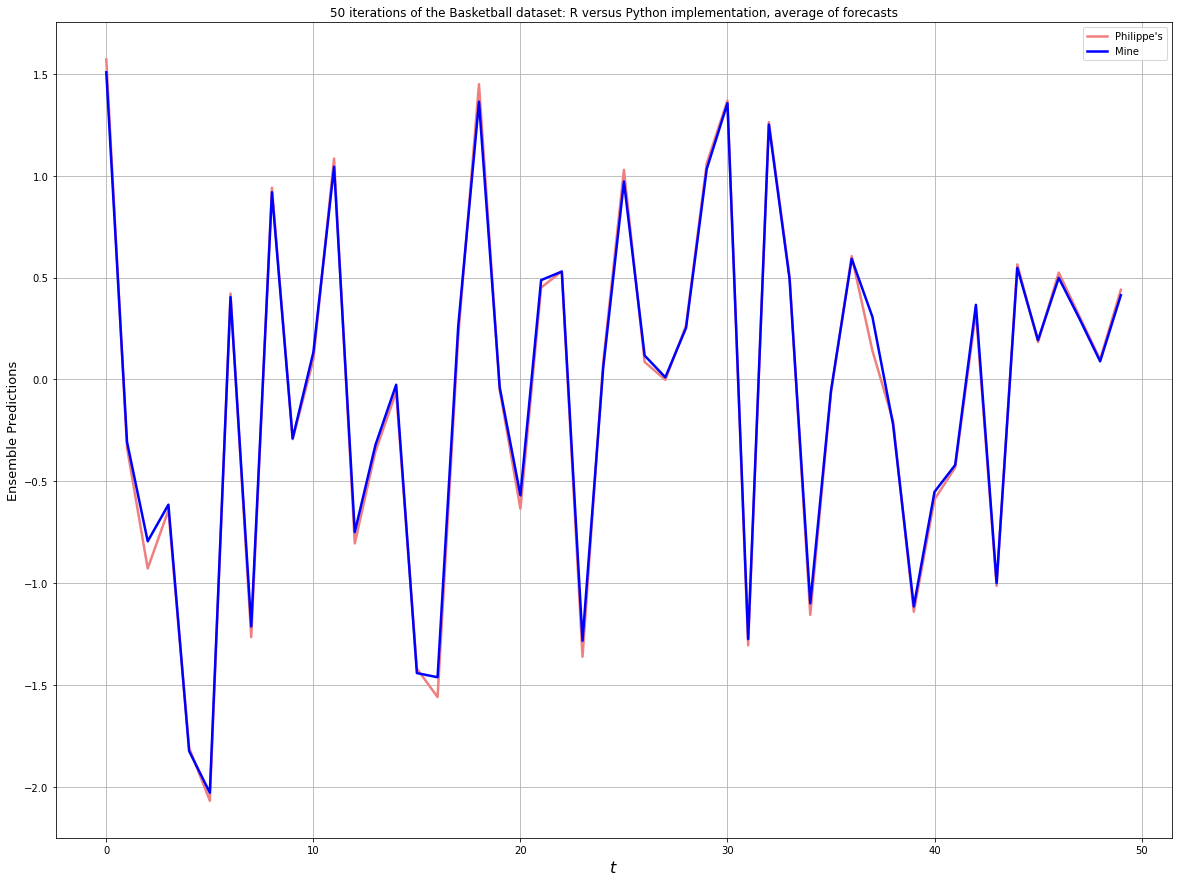

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)
ax.plot(phils_preds.mean(axis = 0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("50 iterations of the Basketball dataset: R versus Python implementation, average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)